# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tazky Khumaira Tsany
- **Email:** mc589d5x2489@student.devacademy.id
- **ID Dicoding:** MC589D5X2489

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda di Washington D.C. selama dua tahun tersebut?
2.  Bagaimana  jumlah penyewaan sepeda di Washington D.C. selama satu bulan pada hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px

## Data Wrangling

### Gathering Data

In [5]:
import pandas as pd

hour_df = pd.read_csv('/content/hour.csv')
day_df = pd.read_csv('/content/day.csv')

print("\nLima baris pertama dataset Hour:")
print(hour_df.head())
print("\nLima baris pertama dataset Day:")
print(day_df.head())


Lima baris pertama dataset Hour:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Lima baris pertama dataset Day:
   instant      dteday  season  

### Assessing Data

In [6]:
# Assessing Data

# Menampilkan informasi data set hour dan day
print("Informasi Dataset Hour:")
print(hour_df.info())
print("\nInformasi Dataset Day:")
print(day_df.info())

# Memeriksa nilai yang hilang
print("\nCek nilai yang hilang di dataset Hour:")
print(hour_df.isnull().sum())
print("\nCek nilai yang hilang di dataset Day:")
print(day_df.isnull().sum())

# Memeriksa nilai duplikat
print("\nJumlah nilai duplikat di dataset Hour:")
print(hour_df.duplicated().sum())
print("\nJumlah nilai duplikat di dataset Day:")
print(day_df.duplicated().sum())

Informasi Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Informasi Dataset D

### Cleaning Data

In [7]:
# Mengonversi kolom 'dteday' ke tipe data datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Menangani nilai yang hilang - Mengisi dengan rata-rata kolom
hour_df.fillna(hour_df.mean(), inplace=True)
day_df.fillna(day_df.mean(), inplace=True)

# Menghapus duplikat
hour_df.drop_duplicates(inplace=True)
day_df.drop_duplicates(inplace=True)

# Mengubah kolom kategori seperti 'season', 'weathersit', 'weekday' menjadi tipe data kategorikal
hour_df['season'] = hour_df['season'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')

day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')

# Menambahkan kolom 'year', 'month', dan 'day' yang diambil dari kolom 'dteday'
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['day'] = hour_df['dteday'].dt.day
hour_df['hour'] = hour_df['dteday'].dt.hour

day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['day'] = day_df['dteday'].dt.day

# Menampilkan informasi dataset setelah data wrangling
print("\nInformasi Dataset Hour Setelah Data Wrangling:")
print(hour_df.info())
print("\nInformasi Dataset Day Setelah Data Wrangling:")
print(day_df.info())



Informasi Dataset Hour Setelah Data Wrangling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

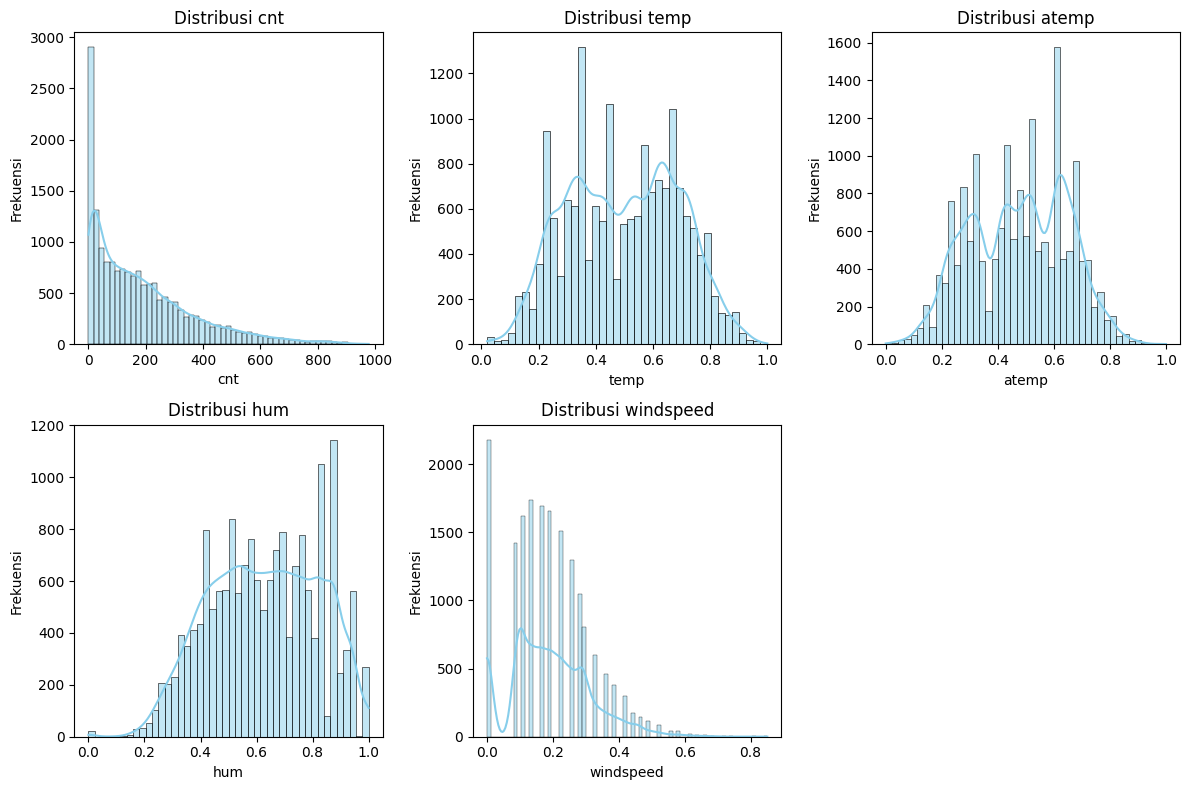

In [8]:
# Exploratory Data Analysis (EDA)

# Visualisasi distribusi kolom numerik
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur ukuran plot
plt.figure(figsize=(12, 8))

# Menampilkan histogram untuk kolom numerik
numeric_columns = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(hour_df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

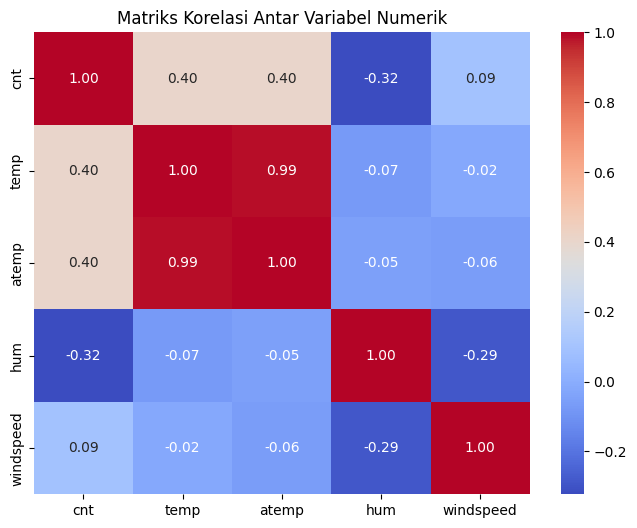

In [9]:
# Menganalisis korelasi antar variabel
corr_matrix = hour_df[numeric_columns].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:.Apa pengaruh musim terhadap jumlah penyewaan sepeda di Washington D.C. selama dua tahun tersebut?

<ipython-input-12-811be7574cb8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=hour_df, palette='Set2')


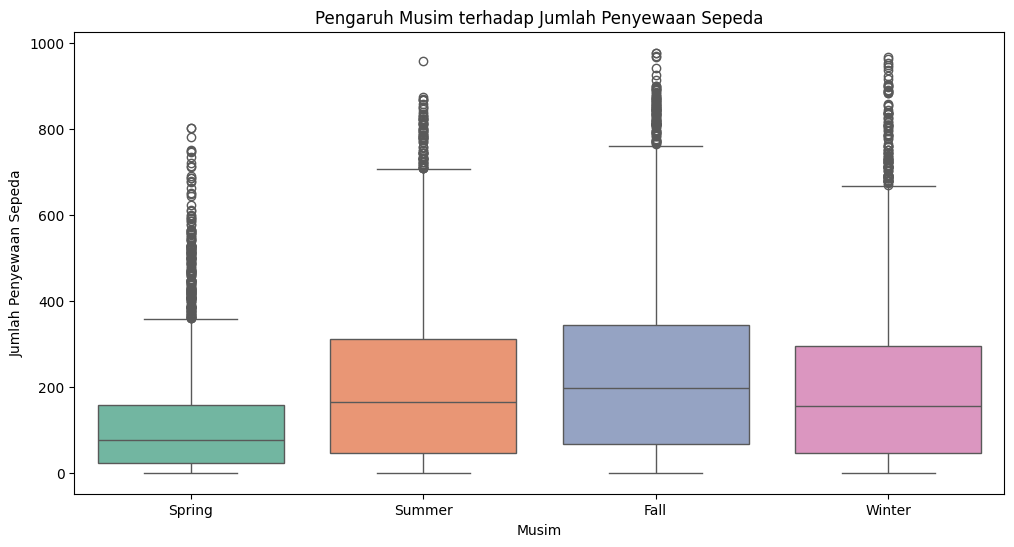

<ipython-input-12-811be7574cb8>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg = hour_df.groupby('season')['cnt'].mean()
<ipython-input-12-811be7574cb8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='Set3')


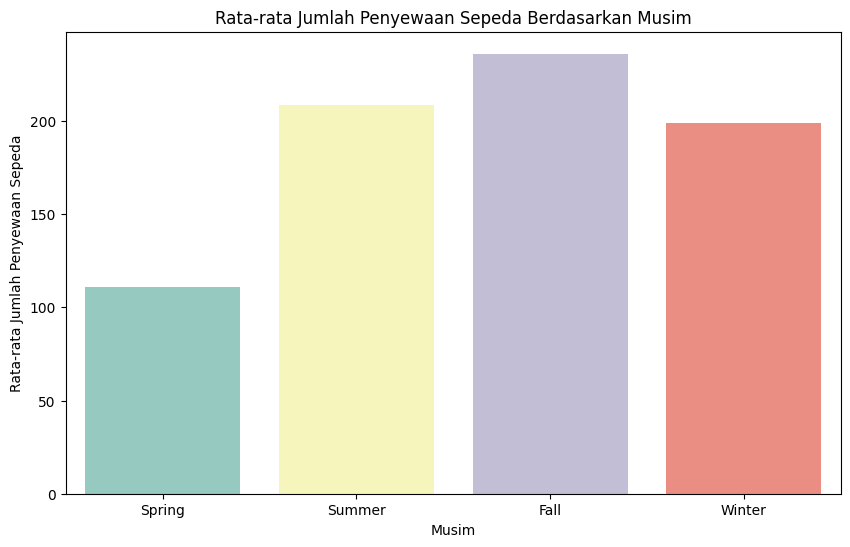

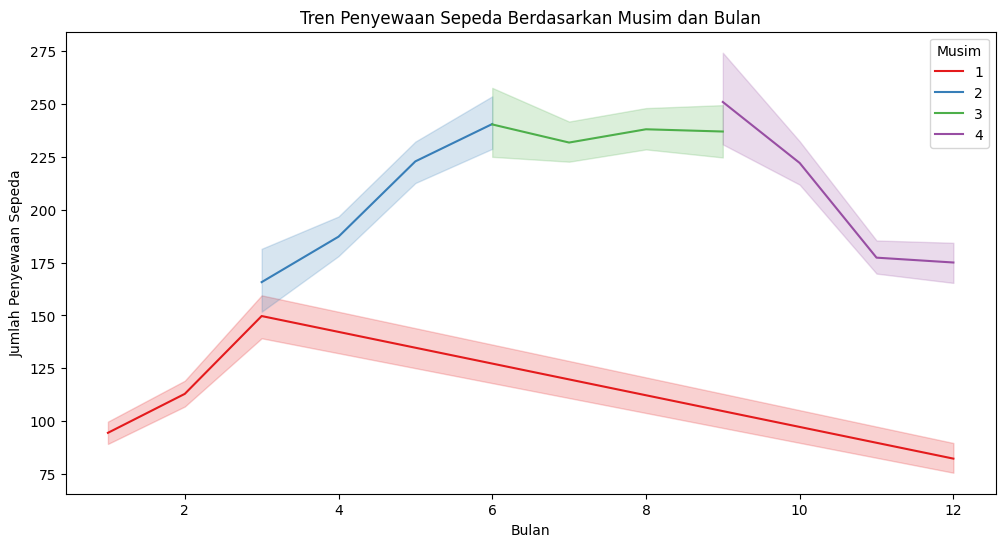

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot untuk menganalisis pengaruh musim terhadap jumlah penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=hour_df, palette='Set2')
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Visualisasi jumlah penyewaan sepeda berdasarkan musim dengan agregasi harian
seasonal_avg = hour_df.groupby('season')['cnt'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='Set3')
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Visualisasi tren penyewaan sepeda berdasarkan musim dan bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='month', y='cnt', hue='season', palette='Set1')
plt.title('Tren Penyewaan Sepeda Berdasarkan Musim dan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Musim')
plt.show()


### Pertanyaan 2 : Bagaimana  jumlah penyewaan sepeda di Washington D.C. selama satu bulan pada hari kerja?

<ipython-input-14-a46dc6daa4da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=filtered_month_df, palette='Set2')


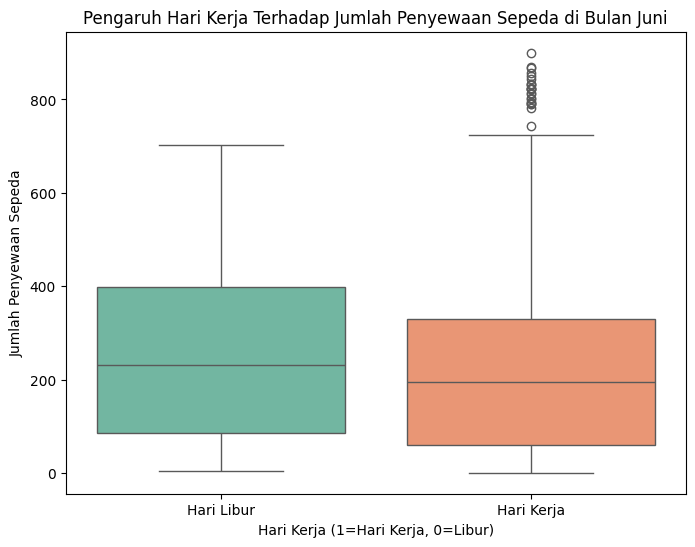

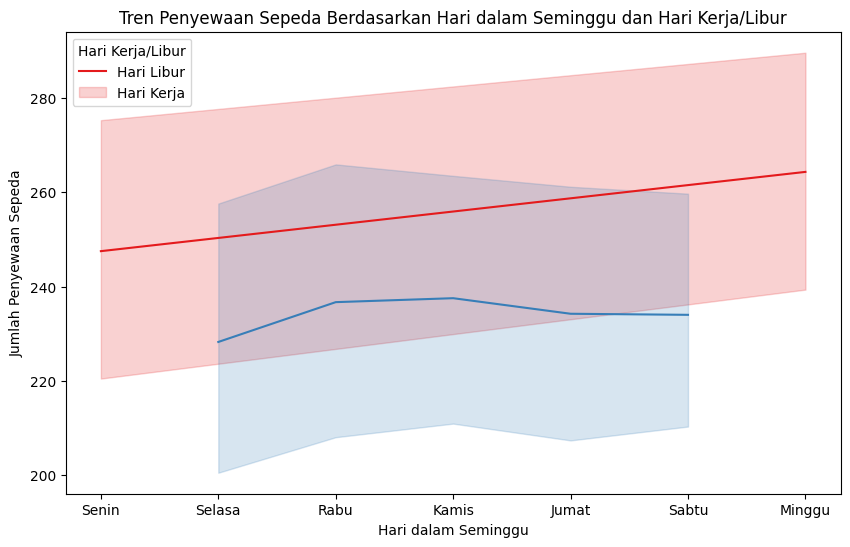

Rata-rata penyewaan sepeda pada hari kerja: 234.2296511627907
Rata-rata penyewaan sepeda pada hari libur: 256.41421568627453


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk bulan tertentu (misalnya bulan Juni, bulan ke-6)
filtered_month_df = hour_df[hour_df['month'] == 6]  # Gantilah '6' dengan bulan yang diinginkan

# Visualisasi boxplot untuk membandingkan penyewaan sepeda pada hari kerja dan libur
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='cnt', data=filtered_month_df, palette='Set2')
plt.title('Pengaruh Hari Kerja Terhadap Jumlah Penyewaan Sepeda di Bulan Juni')
plt.xlabel('Hari Kerja (1=Hari Kerja, 0=Libur)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

# Visualisasi tren penyewaan sepeda berdasarkan hari dalam seminggu dan hari kerja/libur
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_month_df, x='weekday', y='cnt', hue='workingday', palette='Set1')
plt.title('Tren Penyewaan Sepeda Berdasarkan Hari dalam Seminggu dan Hari Kerja/Libur')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Hari Kerja/Libur', labels=['Hari Libur', 'Hari Kerja'])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

# Menghitung rata-rata penyewaan sepeda untuk hari kerja dan libur
avg_workingday = filtered_month_df[filtered_month_df['workingday'] == 1]['cnt'].mean()
avg_weekend = filtered_month_df[filtered_month_df['workingday'] == 0]['cnt'].mean()

# Menampilkan rata-rata penyewaan sepeda untuk hari kerja dan hari libur
print(f'Rata-rata penyewaan sepeda pada hari kerja: {avg_workingday}')
print(f'Rata-rata penyewaan sepeda pada hari libur: {avg_weekend}')


## Conclusion

- Kesimpulan dari Pertanyaan 1: Pengaruh Musim terhadap Jumlah Penyewaan Sepeda di Washington D.C. Selama Dua Tahun
Bedasarkan hasil analisi yang telah dilakukan mengenai pengaruh musim terhadap jumlah penyewaan sepeda selama dua tahun dapat disimpulkan sebagai berikut:
1. Pada Musim Panas /Summer memiliki jumlah penyewaan sepeda paling banyak terjadi hal ini terjadi karena cuaca yang  mendorong banyak orang untuk beraktivitas di luar.
2. Musim semi menunjukkan angka penyewaan sepeda yang lebih tinggi dibandingkan musim gugur dan musim dingin, meskipun masih sedikit lebih rendah dibandingkan musim panas.
3. Pada musim gugur, jumlah penyewaan sepeda menurun dibandingkan dengan musim panas, meskipun masih lebih tinggi dari musim dingin.
4. Winter/Pada musim dingin, penyewaan sepeda berada pada titik terendah. Cuaca yang dingin dan kondisi yang tidak mendukung aktivitas di luar ruangan membuat orang enggan menyewa sepeda.




- Kesimpulan pertanyaan 2: Pengaruh Hari Kerja Terhadap Jumlah Penyewaan Sepeda di Washington D.C. Selama Satu Bulan
Hari kerja menunjukkan penyewaan sepeda yang lebih tinggi, sebagian besar digunakan untuk keperluan transportasi, dengan puncak penyewaan pada jam-jam tertentu (pagi dan sore).

In [15]:
from google.colab import files
import pandas as pd

df_to_download = hour_df
df_to_download.to_csv('ProyekAnalisisData.csv', index=False)
files.download('ProyekAnalisisData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>